# Ejercicio 1 
### Acerca de la compañía
La empresa Dream Housing Finance se ocupa de todos los préstamos hipotecarios. Tienen presencia en todas las zonas urbanas, semiurbanas y rurales. El cliente primero solicita un préstamo hipotecario después la compañia determina si consede el prestamo o lo rechaza.

### Problema
La compañía desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) según los detalles del cliente proporcionados al completar el formulario de solicitud en línea con 12 campos de información. 

Para el desarrollo de esta tarea se ha proporcionado una base con 614 clientes etiquetados con el estatus del crédito y otra adicional con 367 sin etiquetar como validación. A continuación se muestra un detalle de los atributos que tiene.

|Variable  |Description|Tipo|Posibles valores|
|:---------------:|:----------------:|:----------------:|:-----------:|
|Loan_ID   |Loan ID|String|Unique LP000000|
|Gender    |Male/ Female|Categórica|{Male,Female}|
|Married|Applicant married|Categórica|{YES,NO,}|
|Dependents|Number of dependents|Ordinal|{0,1,2, 3+}|
|Education|Applicant Education|Categórica|{Graduate,UnderGraduate}|
|Self_Employed|Self employed (Y/N)|Categórica|{YES,NO,}|
|ApplicantIncome|Applicant income|int64|Numeric|
|CoapplicantIncome|Coapplicant income|float64|Numeric|
|LoanAmount|Loan amount in thousands|float64|Numeric|
|Loan_Amount_Term|Term of loan in months|float64|Numeric|
|Credit_History|credit history meets guidelines|float64|Numeric|
|Property_Area|Tipo de area  |Categórica|{ Urban, Semi Urban,Rural}|
|Loan_Status|Loan approved |Categórica|{YES,NO,}|

Para automatizar este proceso, han planteado un problema para identificar los segmentos de clientes, que son elegibles para el monto del préstamo para que puedan dirigirse específicamente a estos clientes.


# Modulos necesarios para el analisis requerido

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import urllib
from io import StringIO

def get_data(ulr):
    f = urllib.request.urlopen(ulr) 
    data = f.read()
    data=str(data,'utf-8')
    data = StringIO(data) 
    return pd.read_csv(data)

test=pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")
train=pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")


### Informacion general train

Una vez extraidos los datos de las fuentes correspondientes procedemos a realizar un conteo rapido y mostrar la estructura de la información para determinar si se requieren realizar tratamientos previos.

In [2]:
print("Train contine "+str(train.shape[1])+" atributos y "+str(train.shape[0])+" registros")

Train contine 13 atributos y 614 registros


In [58]:
print("Primeros 5 registros")
train.head(5)

Primeros 5 registros


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
print("Informacion general")
train.info()

Informacion general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Como podemos observar tenemos un datos faltantes por lo que es necesario realizar un tratamiento. Ademas de algunas transformaciones para el mejor uso de la información.

### Información general test

Ahora mostramos el mismo análisis para la base de test

In [33]:
print("Train contine "+str(test.shape[1])+" atributos y "+str(test.shape[0])+" registros")

Train contine 12 atributos y 367 registros


In [36]:
print("Primeros 5 registros")
test.head(5)

Primeros 5 registros


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [35]:
print("Informacion general")
test.info()

Informacion general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Missing treatment

Acontinuación procedemos a realizar un análisis de datos faltantes y su tratamiento para su posterior uso.

In [3]:
def num_nulos(x):
  return x.isnull().sum()


t=train.apply(num_nulos, axis=1)
tt=pd.DataFrame(t[:])
tt=tt.rename(columns=lambda x: 'List' + str(x))
print("\nDatos faltantes por variable en la base Train\n")
print(train.apply(num_nulos, axis=0))
print("\nDatos faltantes por solicitud en la base Train\n")
print(tt.List0.value_counts())
print("Clientes con algun dato faltante:"+str(sum(train.apply(num_nulos, axis=1)>0)))


Datos faltantes por variable en la base Train

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Datos faltantes por solicitud en la base Train

0    480
1    121
2     11
3      2
Name: List0, dtype: int64
Clientes con algun dato faltante:134


In [4]:
print("\nDatos faltantes por variables en la base Test\n")
print(test.apply(num_nulos, axis=0))
t=test.apply(num_nulos, axis=1)
tt=pd.DataFrame(t[:])
tt=tt.rename(columns=lambda x: 'List' + str(x))
print("\nDatos faltantes por solicitud en la base Test\n")
print(tt.List0.value_counts())
print("Clientes con algun dato faltante:"+str(sum(test.apply(num_nulos, axis=1)>0)))


Datos faltantes por variables en la base Test

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Datos faltantes por solicitud en la base Test

0    289
1     72
2      6
Name: List0, dtype: int64
Clientes con algun dato faltante:78


Para este análisis se eliminarán todos los registros con algun dato faltante.

In [51]:
train_clean = train.dropna(how='any',axis=0)[:]
train_clean.shape

(480, 13)

In [52]:
test_clean = test.dropna(how='any',axis=0)[:]
test_clean.shape

(289, 12)

In [53]:
train_clean['Gender'].replace('Male',1,inplace=True)
train_clean['Gender'].replace('Female',0,inplace=True)
train_clean['Married'].replace('No',0,inplace=True)
train_clean['Married'].replace('Yes',1,inplace=True)
train_clean['Education'].replace('Graduate',1,inplace=True)
train_clean['Education'].replace('Not Graduate',0,inplace=True)
train_clean['Self_Employed'].replace('Yes',1,inplace=True)
train_clean['Self_Employed'].replace('No',0,inplace=True)
train_clean['Loan_Status'].replace('Y',1,inplace=True)
train_clean['Loan_Status'].replace('N',0,inplace=True)
print("Train")
train_clean.head(5)

Train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [55]:
test_clean['Gender'].replace('Male',1,inplace=True)
test_clean['Gender'].replace('Female',0,inplace=True)
test_clean['Married'].replace('No',0,inplace=True)
test_clean['Married'].replace('Yes',1,inplace=True)
test_clean['Education'].replace('Graduate',1,inplace=True)
test_clean['Education'].replace('Not Graduate',0,inplace=True)
test_clean['Self_Employed'].replace('Yes',1,inplace=True)
test_clean['Self_Employed'].replace('No',0,inplace=True)

print("Test")
test_clean.head(5)

Test


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,Urban


### Análisis de las variables

Ahora veremos estadisticos generales para la base de train.

In [56]:
print("Análisis de frecuencia para las variables categóricas")
print("\nGenero:\n")
print(train_clean['Gender'].value_counts())
print("\nMarried:\n")
print(train_clean['Married'].value_counts())
print("\nEducation:\n")
print(train_clean['Education'].value_counts())
print("\nSelf employed:\n")
print(train_clean['Self_Employed'].value_counts())
print("\nLoand status:\n")
print(train_clean['Loan_Status'].value_counts())
print("\nProperty area:\n")
print(train_clean['Property_Area'].value_counts())
print("\n Credit_History:\n")
print(train_clea['Credit_History'].describe())

Análisis de frecuencia para las variables categóricas

Genero:

1    394
0     86
Name: Gender, dtype: int64

Married:

1    311
0    169
Name: Married, dtype: int64

Education:

1    383
0     97
Name: Education, dtype: int64

Self employed:

0    414
1     66
Name: Self_Employed, dtype: int64

Loand status:

1    332
0    148
Name: Loan_Status, dtype: int64

Property area:

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

 Credit_History:



NameError: name 'train_clea' is not defined

In [43]:
print("Estadisticos variables continuas")
print("\nApplicantIncome:\n")
print(train_clean.ApplicantIncome.describe())
print(" CoapplicantIncome:\n")
print(train_clean.CoapplicantIncome.describe())
print("\nLoanAmount:\n")
print(train_clean.LoanAmount.describe())
print("\nLoan_Amount_Term:\n")
print(train_clean.Loan_Amount_Term.describe())

Estadisticos variables continuas

ApplicantIncome:

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64
 CoapplicantIncome:

count      480.000000
mean      1581.093583
std       2617.692267
min          0.000000
25%          0.000000
50%       1084.500000
75%       2253.250000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

LoanAmount:

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

Loan_Amount_Term:

count    480.000000
mean     342.050000
std       65.212401
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


## Analisis por historial crediticio

Veremos si existe una relacion entre tener historial crediticio y nuestro target.

In [57]:
pd.crosstab(train_clean["Credit_History"],train_clean["Loan_Status"],margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


Si existe una relacion entre ambos, para poder verla mejor normalizaremos la proporcion.

In [58]:
pd.crosstab(train_clean["Credit_History"],train_clean["Loan_Status"],margins=True,normalize='index')

Loan_Status,0,1
Credit_History,,
0.0,0.900000,0.100000
1.0,0.207317,0.792683
All,0.308333,0.691667


Casi el 80% de las solicitudes con historial crediticio fueron aprobadas, caso contrario con los que no lo tienen con apenas un 10% de aprobación. Con base en lo anterior podemos observar claramente que al tener un historial crediticio previo beneficia mucho la probabilidad de aceptacion del credito, esto nos ayudara a generar la segmentacion que se desea otener.

In [59]:
print(pd.crosstab(train_clean["Gender"],train_clean["Loan_Status"],margins=True))
print("En porcentajes:")
print(pd.crosstab(train_clean.Gender,train_clean.Loan_Status,normalize='index'))

Loan_Status    0    1  All
Gender                    
0             32   54   86
1            116  278  394
All          148  332  480
En porcentajes:
Loan_Status         0         1
Gender                         
0            0.372093  0.627907
1            0.294416  0.705584


Para el caso del genero, mas del 80% de los prestamos son solicitados por hombres y su aprobación es 10% mas alto.

### Analisi de distribucion para el monto del prestamo

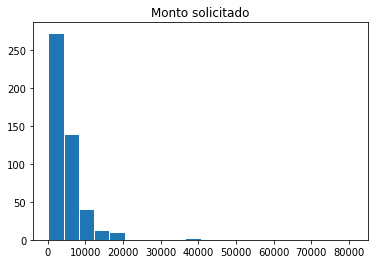

In [62]:
plt.title('Monto solicitado')
plt.hist(train_clean["ApplicantIncome"],bins=20,edgecolor = 'white')
plt.show()

Al quitar los outlier podemos apreciar mejor la distribucion del ingreso.

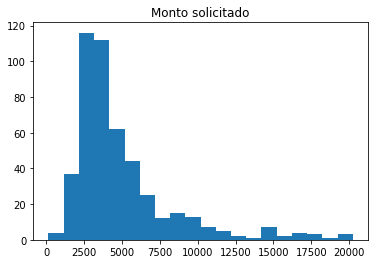

In [64]:

plt.hist(train_clean["ApplicantIncome"][train_clean["ApplicantIncome"] <train_clean["ApplicantIncome"].quantile(0.99)],bins=20)
plt.title('Monto solicitado')
plt.show()

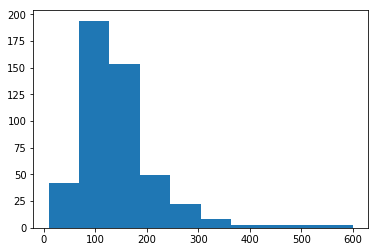

In [137]:
plt.hist(train_clean["LoanAmount"])
plt.show()


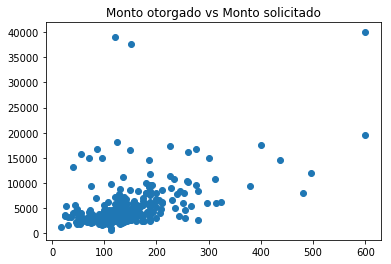

In [78]:
train_loand=train_clean[train_clean.Loan_Status==1]
plt.title('Monto otorgado vs Monto solicitado')
plt.scatter(train_loand.LoanAmount,train_loand.ApplicantIncome)
plt.show()

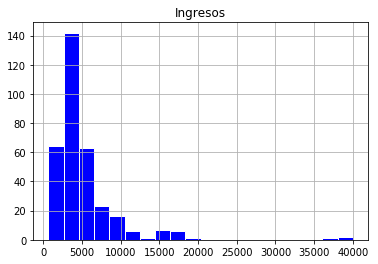

In [76]:
plt.title('Ingresos')
train_loand["ApplicantIncome"].hist(bins=20, color = 'blue', edgecolor = 'white')


En general las personas con menor ingreso son las que solicitan un prestamo, lo cual es un poco intuitivo.

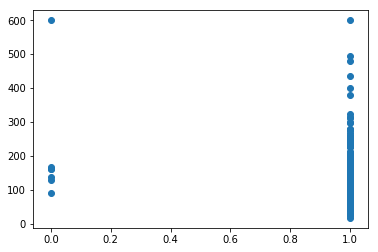

In [79]:
train_loand=train_clean[train_clean.Loan_Status==1]
plt.scatter(train_loand.Credit_History,train_loand.LoanAmount)
plt.show()

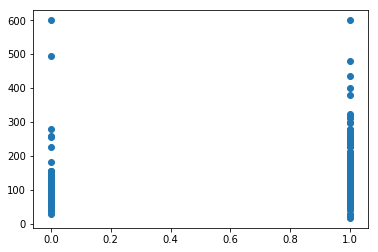

In [82]:
train_loan=train_clean[train_clean.Loan_Status==1]
plt.scatter(train_loand.Gender,train_loand.LoanAmount)
plt.show()


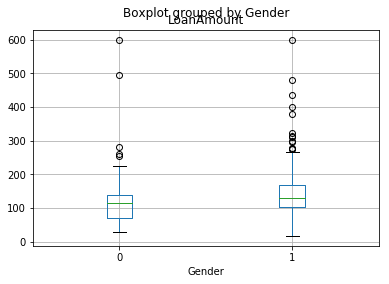

In [90]:

train_loan.boxplot(column='LoanAmount',by='Gender')


Ademas de ser los hombres quienes mejor ratio de aprobación tienen tambien les conceden prestamos mas altos

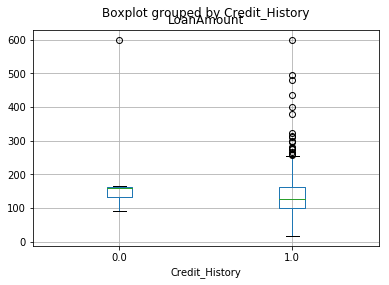

In [92]:
train_loan.boxplot(column='LoanAmount',by='Credit_History')

Para lo mismo con el historial crediticio. Podría deberse a la experiencia crediticia del cliente.

### Conclusiones 

Con este primer analisis pudimos observar que podriamos generar un modelo de aprendizaje supervisado para determinar a que clientes se lese debería o no otorgar un prestamo. El siguiente paso seria realizar un mejor tratamiento de los datos faltantes, generar variables sinteticas iniciar un proceso de seleccion de variables, entrenar distintos modelos y seleccionar el que mejor desempeño vista el problema en especifico sea el mejor.